In [54]:
# New PHOENIX Differences: For THESIS

In [29]:
import numpy as np
from astropy.io import fits
from spectrum_overload import Spectrum
import eniric
from eniric.utilities import load_aces_spectrum, load_btsettl_spectrum
import matplotlib.pyplot as plt
from astro_scripts.plot_fits import get_wavelength,ccf_astro, vac2air

In [2]:
wa1, fa1 = load_aces_spectrum([5500, 4.5, 0, 0])
wb1, fb1 =  load_btsettl_spectrum([5500, 4.5])
wa2, fa2 =  load_aces_spectrum([4000, 4.5, 0, 0])
wb2, fb2 =  load_btsettl_spectrum([4000, 4.5])
wa3, fa3 =  load_aces_spectrum([2300, 4.5, 0, 0])
wb3, fb3 = load_btsettl_spectrum([2300, 4.5])

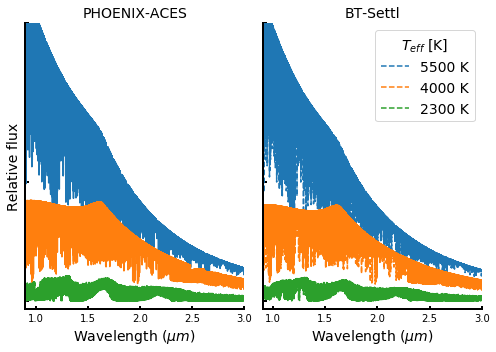

In [3]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(121)
plt.plot(wa1, fa1/np.max(fa1), label="Teff=5500 K")
plt.plot(wa2, fa2/np.max(fa1), label="Teff=4000 K")
plt.plot(wa3, fa3/np.max(fa1), label="Teff=2300 K")
plt.title("PHOENIX-ACES", fontsize=14)
plt.ylabel(r"Relative flux", fontsize=14)
plt.xlabel(r"Wavelength ($\mu m$)", fontsize=14)
plt.xlim(0.9,3)
ax2 = fig.add_subplot(122, sharex=ax1, sharey=ax1)
plt.plot(wb1, fb1/np.max(fb1),"--", label="5500 K")
plt.plot(wb2, fb2/np.max(fb1),"--", label="4000 K")
plt.plot(wb3, fb3/np.max(fb1),"--", label="2300 K")
plt.title("BT-Settl", fontsize=14)

leg = plt.legend(fontsize=14 )
leg.set_title("$T_{eff}$ [K]", prop = {'size':14})
plt.xlim(0.9,3)
plt.ylim(-0.02, 0.7)
plt.xlabel(r"Wavelength ($\mu m$)", fontsize=14)

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.tight_layout()

plt.savefig("phoenix_large_scale_comparision.pdf", dpf=600)
plt.show()

In [96]:
# ARTUCUS 4300\K
from eniric.broaden import resolution_convolution

# Teff 4300, 1.5 logg, -0.0 [Fe/H]
# Convovle to R=100000
R = 100000

In [97]:
def align2model(spectrum, model):
    rv1, r_sun, c_sun, x_sun, y_sun = ccf_astro((spectrum.xaxis, -spectrum.flux + 1), (model.xaxis, -model.flux + 1))
    spectrum.doppler_shift(-rv1)
    print(rv1)
    return spectrum


[14.3183501]


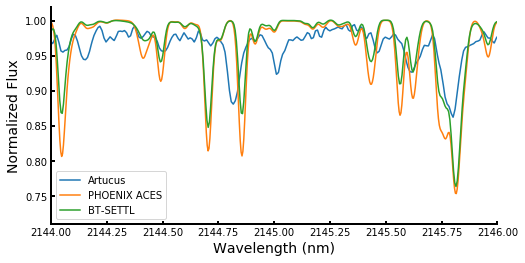

In [98]:
artucus_2 = "/home/jneal/Phd/data/artucus/21380-21518_s-obs.fits"
data, hdr = fits.getdata(artucus_2, header=True)
artucus_2 = Spectrum(xaxis=get_wavelength(hdr)/10, flux=data, header=hdr)


waces, faces = load_aces_spectrum([4300, 1.5,0,0], wl_range=(21350,21530))
wsettl, fsettl = load_btsettl_spectrum([4300, 2.5], wl_range=(21350,21530))

artucus_aces = Spectrum(xaxis=waces*1000, flux=faces)
artucus_settl = Spectrum(xaxis=wsettl*1000, flux=fsettl)


artucus_aces.flux = resolution_convolution(artucus_aces.xaxis,artucus_aces.xaxis,
                                   artucus_aces.flux, R=100000, num_procs=3)
artucus_settl.flux = resolution_convolution(artucus_settl.xaxis,artucus_settl.xaxis,
                                   artucus_settl.flux, R=100000, num_procs=3)

# NORMALIZE
artucus_settl = artucus_settl.normalize("exponential")
artucus_aces =artucus_aces.normalize("exponential")


artucus_2 = align2model(artucus_2, artucus_aces)


plt.figure(figsize=(8, 4))
(artucus_2 + .0).plot(label="Artucus")

artucus_aces.plot(label="PHOENIX ACES")
artucus_settl.plot(label="BT-SETTL")

plt.xlim((2144, 2146))
plt.ylim((0.71, 1.02))

#plt.title("Artucus - 4300K", fontsize=14)
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Normalized Flux", fontsize=14)
plt.legend(fontsize=12)
plt.legend()

plt.savefig("artucus_2micron.pdf", dpi=600)
plt.show()

[11.31926076]


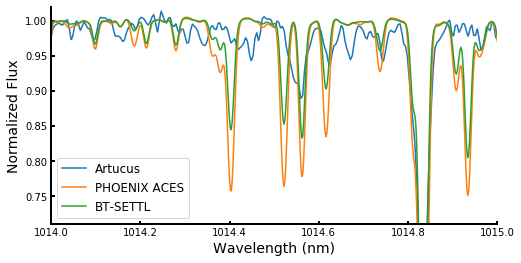

In [99]:
artucus_1 = "/home/jneal/Phd/data/artucus/10097-10155_s-obs.fits"
data, hdr = fits.getdata(artucus_1, header=True)
artucus_1 = Spectrum(xaxis=get_wavelength(hdr)/10, flux=data, header=hdr )
artucus_1 = artucus_1.normalize("linear")

waces, faces = load_aces_spectrum([4300, 1.5,0,0], wl_range=(10090,10159))
wsettl, fsettl = load_btsettl_spectrum([4300, 2.5], wl_range=(10090,10159))

artucus_aces = Spectrum(xaxis=waces*1000, flux=faces)
artucus_settl = Spectrum(xaxis=wsettl*1000, flux=fsettl)

artucus_1 = align2model(artucus_1, artucus_aces)

artucus_aces.flux = resolution_convolution(artucus_aces.xaxis,artucus_aces.xaxis,
                                   artucus_aces.flux, R=100000, num_procs=3)
artucus_settl.flux = resolution_convolution(artucus_settl.xaxis,artucus_settl.xaxis,
                                   artucus_settl.flux, R=100000, num_procs=3)

# NORMALIZE
artucus_settl = artucus_settl.normalize("exponential")
artucus_aces =artucus_aces.normalize("exponential")

plt.figure(figsize=(8, 4))
(artucus_1 + .0).plot(label="Artucus")

artucus_aces.plot(label="PHOENIX ACES")
artucus_settl.plot(label="BT-SETTL" )

plt.xlim((1014, 1015))
plt.ylim((0.71, 1.02))
#plt.title("Artucus - 4300K", fontsize=14)
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Normalized Flux", fontsize=14)
plt.legend(fontsize=12)
plt.savefig("artucus_1micron.pdf", dpi=600)
plt.show()

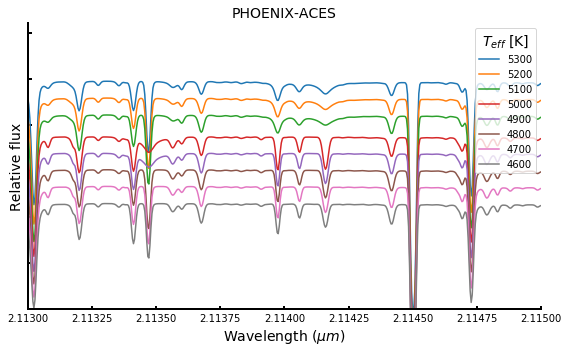

In [100]:
# Difference in Phoenix-aces at 5000\K

temps = np.arange(4600, 5400,100)
plt.figure(figsize=(8,5))
ax1 = plt.subplot(111)
for temp in temps[::-1]:
    w, f = load_aces_spectrum([temp, 4.5, 0])
    plt.plot(w*1000,f/1e10, label=temp)
    
leg = plt.legend(loc=1)
leg.set_title("$T_{eff}$ [K]", prop = {'size':14})

plt.xlim(2113, 2115)
plt.ylim(0.6, 0.91)
plt.xlabel(r"Wavelength (nm)", fontsize=14)
plt.title("PHOENIX-ACES", fontsize=14)
plt.ylabel(r"Relative flux", fontsize=14)
plt.xlabel(r"Wavelength (nm)", fontsize=14)
plt.setp(ax1.get_yticklabels(), visible=False)
plt.tight_layout()

plt.show()

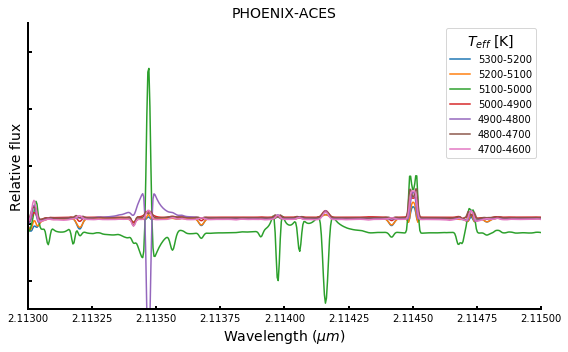

In [101]:
temps = np.arange(4600, 5300,100)
plt.figure(figsize=(8,5))
ax1 = plt.subplot(111)
for temp in temps[::-1]:
    w, f = load_aces_spectrum([temp, 4.5, 0])
    w1, f1 = load_aces_spectrum([temp + 100, 4.5, 0])
    plt.plot(w*1000, (f-f1)/1e10, label="{}-{}".format(temp+100,temp))
    
leg = plt.legend()
leg.set_title("$T_{eff}$ [K]", prop = {'size':14})

plt.xlim(2.113, 2.115)
plt.ylim(-0.05, 0.05)
plt.xlabel(r"Wavelength (nm)", fontsize=14)
plt.title("PHOENIX-ACES", fontsize=14)
plt.ylabel(r"Relative flux", fontsize=14)
plt.xlabel(r"Wavelength (nm)", fontsize=14)
plt.setp(ax1.get_yticklabels(), visible=False)
plt.tight_layout()

plt.show()

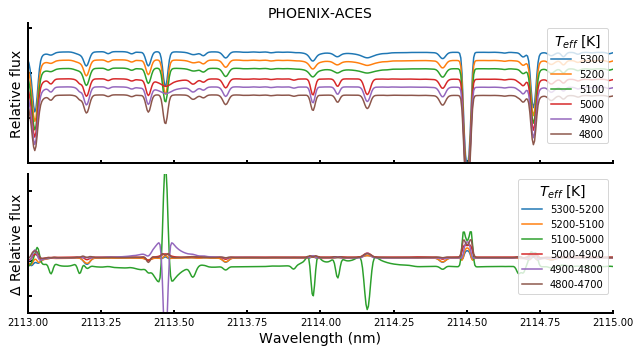

In [105]:
# Difference in Phoenix-aces at 5000\K
temps = np.arange(4700, 5400,100)
plt.figure(figsize=(9,5))
ax1 = plt.subplot(211)
for temp in temps[1:][::-1]:
    w, f = load_aces_spectrum([temp, 4.5, 0])
    plt.plot(w*1000,f/1e10, label=temp)
    
leg = plt.legend(loc=1)
leg.set_title("$T_{eff}$ [K]", prop = {'size':14})

plt.xlim(2113, 2115)
plt.ylim(0.6, 0.91)
plt.title("PHOENIX-ACES", fontsize=14)
plt.ylabel(r"Relative flux", fontsize=14)
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2= plt.subplot(212, sharex=ax1)
for temp in temps[:-1][::-1]:
    w, f = load_aces_spectrum([temp, 4.5, 0])
    w1, f1 = load_aces_spectrum([temp + 100, 4.5, 0])
    plt.plot(w*1000, (f-f1)/1e10, label="{}-{}".format(temp+100,temp))
    
leg = plt.legend(loc=1)
leg.set_title("$T_{eff}$ [K]", prop = {'size':14})

plt.xlim(2113, 2115)
plt.ylim(-0.05, 0.03)

#plt.title("PHOENIX-ACES", fontsize=14)
plt.ylabel(r"$\Delta$ Relative flux", fontsize=14)
plt.xlabel(r"Wavelength (nm)", fontsize=14)
plt.setp(ax2.get_yticklabels(), visible=False)

plt.tight_layout()

plt.savefig("phoenix_differece_at_5000K.pdf", dpi=600)
plt.show()